# Coverage analysis

In [2]:
import networkx as nx
import matplotlib
from matplotlib import pyplot

## Load graph
Parsing GFA file manually, since GfaPy takes a strangely long amount of time reading through it.

In [3]:
FILENAME = "/home/marcus/PevznerLabBigData/sheep_graph_noseq.gfa"

# We ignore directionality for right now
graph = nx.Graph()

with open(FILENAME, "r") as gfafile:
    for line in gfafile:
        if line[0] == "S":
            parts = line.strip().split("\t")
            node_name = parts[1]
            node_len = None
            node_cov = None
            extra_data = parts[3:]
            for tag in extra_data:
                if tag.startswith("LN:i:"):
                    if node_len is None:
                        node_len = int(tag[5:])
                    else:
                        raise ValueError("Duplicate length for node {}".format(node_name))
                elif tag.startswith("dp:i:"):
                    if node_cov is None:
                        node_cov = int(tag[5:])
                    else:
                        raise ValueError("Duplicate coverage for node {}".format(node_name))
            graph.add_node(node_name, length=node_len, cov=node_cov)
        elif line[0] == "L":
            parts = line.strip().split("\t")
            src = parts[1]
            snk = parts[3]
            # Ignore directionality for just right now
            graph.add_edge(src, snk)

print("Graph contains {} edges (represented as GFA segments).".format(graph.number_of_nodes()))
print("Graph contains {} links between edges (ignoring directionality for now).".format(graph.number_of_edges()))
print("Graph contains {} connected components.".format(nx.number_connected_components(graph)))

Graph contains 23064 edges (represented as GFA segments).
Graph contains 187894 links between edges (ignoring directionality for now).
Graph contains 10142 connected components.


## Compute coverage statstics

In [4]:
# Sort components by avg coverage:
# https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html#networkx.algorithms.components.connected_components
node2len = nx.get_node_attributes(graph, "length")
node2cov = nx.get_node_attributes(graph, "cov")
sorted_components = sorted(
    nx.connected_components(graph),
    key=lambda nodeset: sum([node2cov[node] for node in nodeset]) / len(nodeset),
    reverse=True
)

min_cov = float("inf")
max_cov = float("-inf")
total_cov = 0
cmp2totalLen = {}
cmp2meanCov = {}
cmp2cov = {}
for i, cmp in enumerate(sorted_components):
    cmp2cov[i] = [node2cov[node] for node in cmp]
    cmp2totalLen[i] = sum([node2len[node] for node in cmp])
    cmp2meanCov[i] = sum(cmp2cov[i]) / len(cmp)
    min_cov = min(min_cov, *cmp2cov[i])
    max_cov = max(max_cov, *cmp2cov[i])
    total_cov += sum(cmp2cov[i])
    # https://stackoverflow.com/a/10742904/10730311
    cmpNum = "{:,}".format(i + 1).ljust(6, " ")
    print("Component #{}: {} edges, total length {:,}, mean coverage {:.2f}x, has edge {}".format(
        # https://stackoverflow.com/a/59841/10730311
        cmpNum, len(cmp), cmp2totalLen[i], cmp2meanCov[i], next(iter(cmp))
    ))
avg_cov = total_cov / graph.number_of_nodes()

Component #1     : 1 edges, total length 7,157, mean coverage 28535.00x, has edge 1864
Component #2     : 1 edges, total length 48,762, mean coverage 5558.00x, has edge 16214
Component #3     : 1 edges, total length 43,490, mean coverage 5459.00x, has edge 6081
Component #4     : 1 edges, total length 5,613, mean coverage 4436.00x, has edge 13922
Component #5     : 1 edges, total length 38,785, mean coverage 3219.00x, has edge 22543
Component #6     : 1 edges, total length 27,835, mean coverage 2806.00x, has edge 3605
Component #7     : 1 edges, total length 2,310,655, mean coverage 1255.00x, has edge 1374
Component #8     : 1 edges, total length 59,789, mean coverage 1122.00x, has edge 22951
Component #9     : 1 edges, total length 183,541, mean coverage 1050.00x, has edge 8537
Component #10    : 1 edges, total length 14,839, mean coverage 944.00x, has edge 9732
Component #11    : 1 edges, total length 38,377, mean coverage 876.00x, has edge 22794
Component #12    : 1 edges, total len

Component #3,353 : 1 edges, total length 49,638, mean coverage 5.00x, has edge 11265
Component #3,354 : 1 edges, total length 67,859, mean coverage 5.00x, has edge 11291
Component #3,355 : 1 edges, total length 43,104, mean coverage 5.00x, has edge 11306
Component #3,356 : 1 edges, total length 8,209, mean coverage 5.00x, has edge 11320
Component #3,357 : 3 edges, total length 68,002, mean coverage 5.00x, has edge 11347
Component #3,358 : 1 edges, total length 4,781, mean coverage 5.00x, has edge 11365
Component #3,359 : 1 edges, total length 39,711, mean coverage 5.00x, has edge 11390
Component #3,360 : 1 edges, total length 4,055, mean coverage 5.00x, has edge 11400
Component #3,361 : 1 edges, total length 95,350, mean coverage 5.00x, has edge 11404
Component #3,362 : 1 edges, total length 136,087, mean coverage 5.00x, has edge 11411
Component #3,363 : 1 edges, total length 7,901, mean coverage 5.00x, has edge 11498
Component #3,364 : 1 edges, total length 17,483, mean coverage 5.00x

Component #6,253 : 1 edges, total length 78,233, mean coverage 4.00x, has edge 19835
Component #6,254 : 1 edges, total length 64,592, mean coverage 4.00x, has edge 19842
Component #6,255 : 1 edges, total length 34,787, mean coverage 4.00x, has edge 19845
Component #6,256 : 1 edges, total length 37,651, mean coverage 4.00x, has edge 19847
Component #6,257 : 1 edges, total length 108,104, mean coverage 4.00x, has edge 19852
Component #6,258 : 1 edges, total length 50,792, mean coverage 4.00x, has edge 19853
Component #6,259 : 1 edges, total length 98,171, mean coverage 4.00x, has edge 19857
Component #6,260 : 1 edges, total length 41,230, mean coverage 4.00x, has edge 19864
Component #6,261 : 1 edges, total length 37,422, mean coverage 4.00x, has edge 19868
Component #6,262 : 1 edges, total length 39,384, mean coverage 4.00x, has edge 19873
Component #6,263 : 1 edges, total length 40,851, mean coverage 4.00x, has edge 19874
Component #6,264 : 1 edges, total length 138,958, mean coverage 

Component #8,765 : 1 edges, total length 54,387, mean coverage 3.00x, has edge 16082
Component #8,766 : 1 edges, total length 209,367, mean coverage 3.00x, has edge 16093
Component #8,767 : 1 edges, total length 39,905, mean coverage 3.00x, has edge 16112
Component #8,768 : 1 edges, total length 21,218, mean coverage 3.00x, has edge 16117
Component #8,769 : 1 edges, total length 65,017, mean coverage 3.00x, has edge 16120
Component #8,770 : 1 edges, total length 12,264, mean coverage 3.00x, has edge 16123
Component #8,771 : 1 edges, total length 145,234, mean coverage 3.00x, has edge 16138
Component #8,772 : 1 edges, total length 55,911, mean coverage 3.00x, has edge 16147
Component #8,773 : 1 edges, total length 56,590, mean coverage 3.00x, has edge 16156
Component #8,774 : 1 edges, total length 44,502, mean coverage 3.00x, has edge 16158
Component #8,775 : 1 edges, total length 65,859, mean coverage 3.00x, has edge 16160
Component #8,776 : 1 edges, total length 94,438, mean coverage 

## Print entire-graph coverage statistics

In [5]:
print("Minimum coverage: {}".format(min_cov))
print("Maximum coverage: {}".format(max_cov))
print("Average coverage: {:.2f}".format(avg_cov))

Minimum coverage: 0
Maximum coverage: 43363
Average coverage: 36.32


## Visualize histogram of average coverage by component

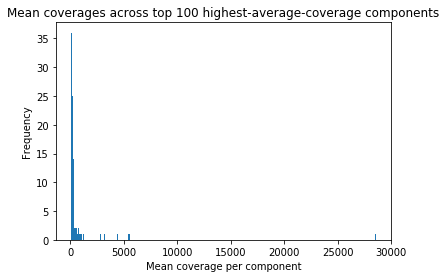

In [7]:
%matplotlib inline

pyplot.hist(x=[cmp2meanCov[c] for c in range(100)], bins="auto")
pyplot.xlabel("Mean coverage per component")
pyplot.ylabel("Frequency")
pyplot.title("Mean coverages across top 100 highest-average-coverage components")
pyplot.show()

## Visualize coverage histograms for the top $N$ components by total edge length
Adapted from [this article](https://realpython.com/python-histograms/#visualizing-histograms-with-matplotlib-and-pandas).

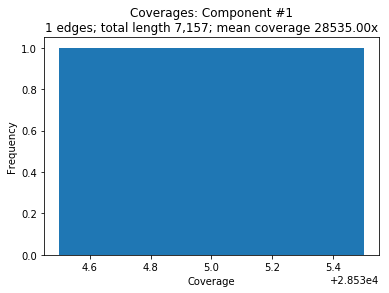

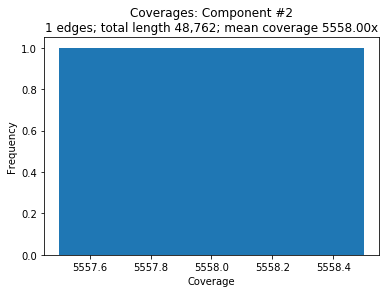

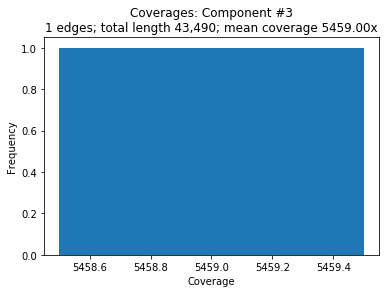

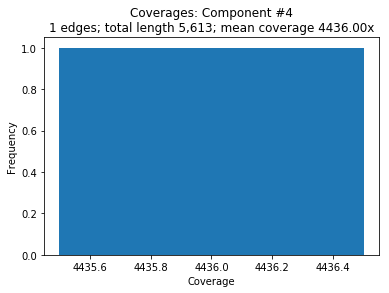

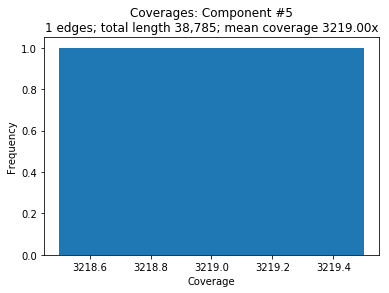

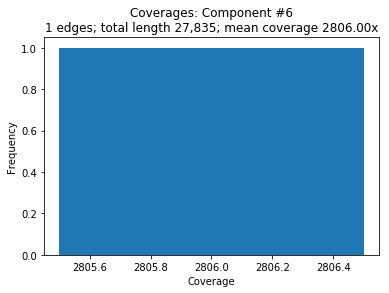

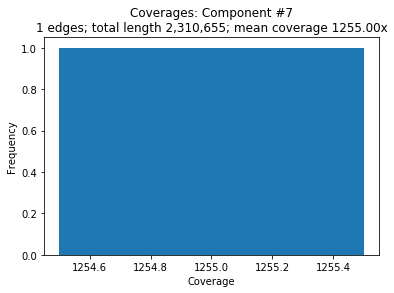

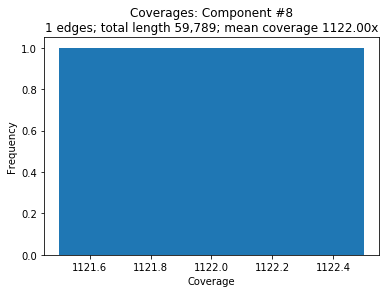

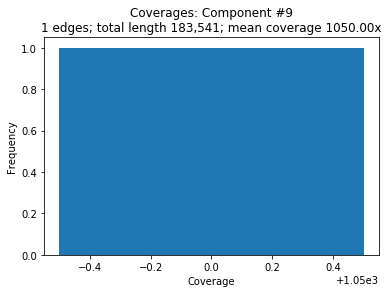

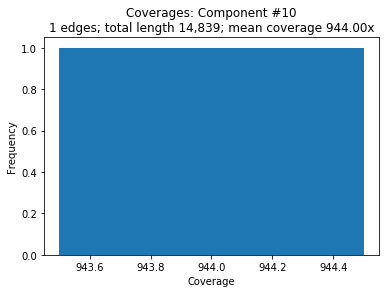

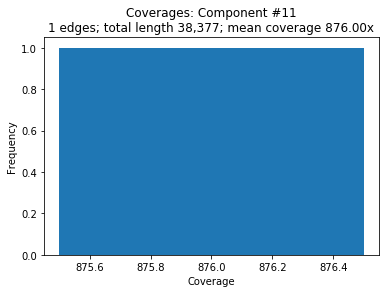

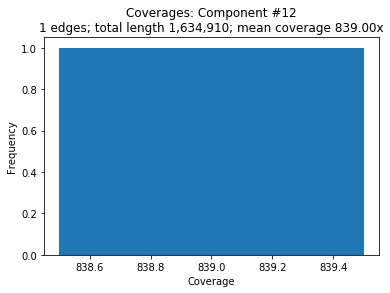

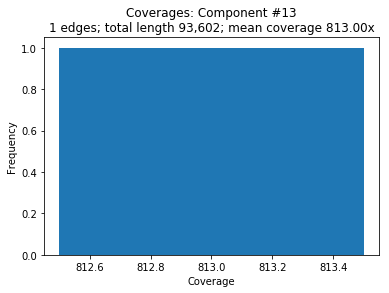

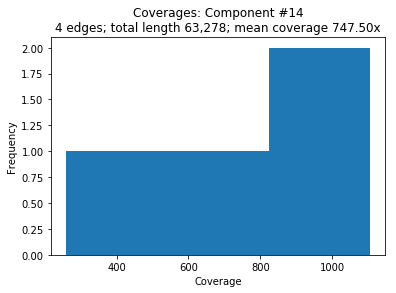

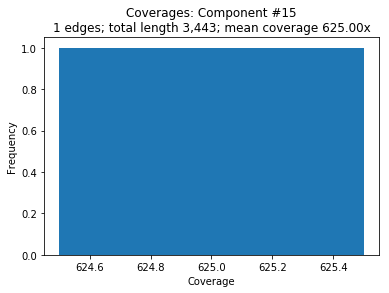

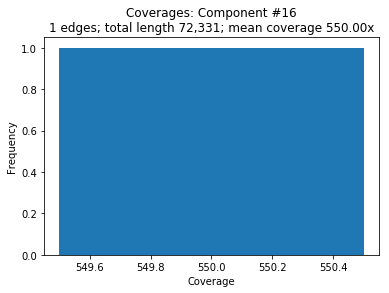

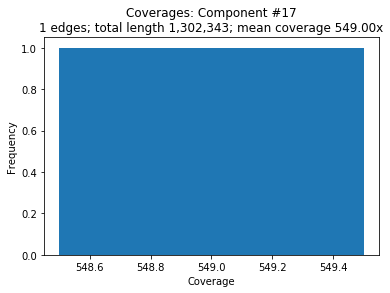

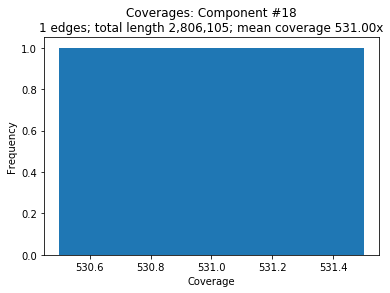

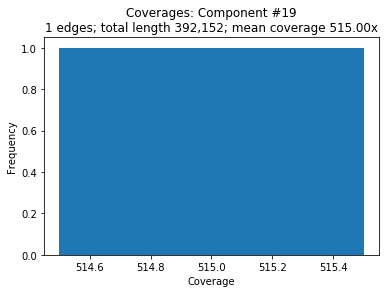

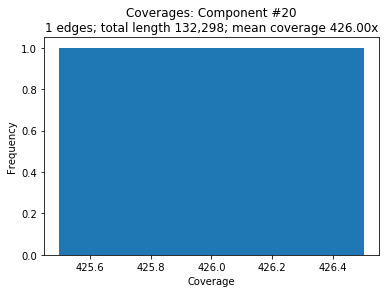

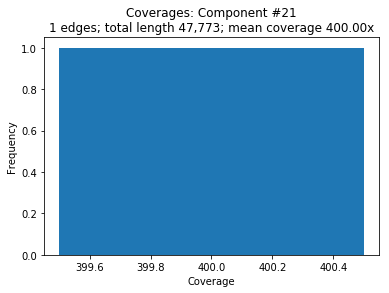

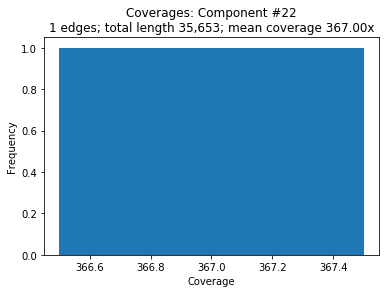

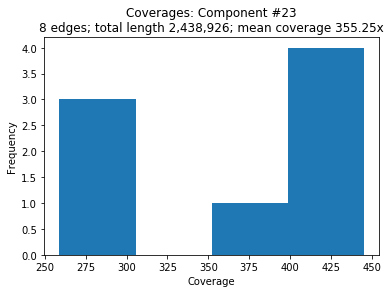

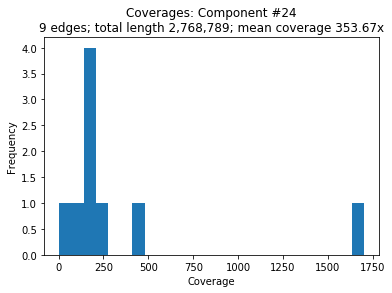

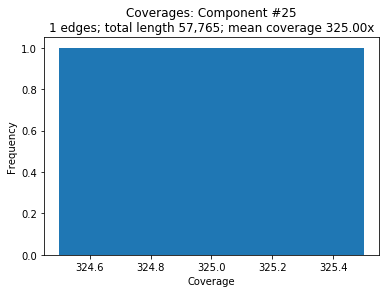

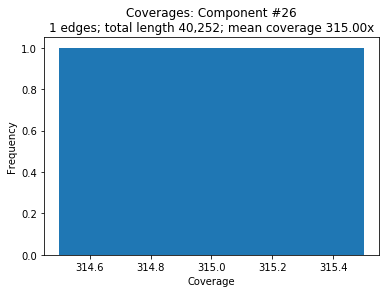

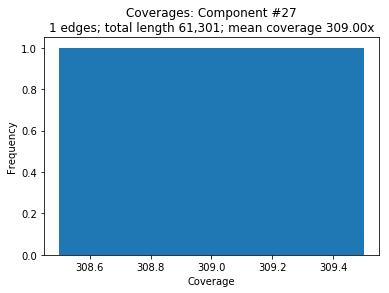

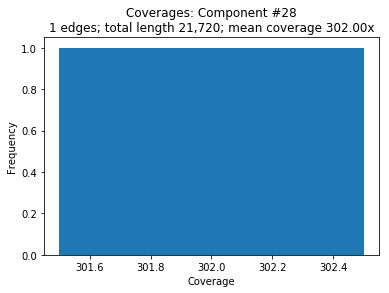

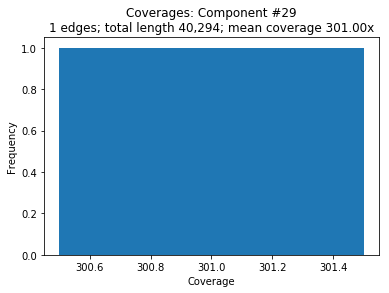

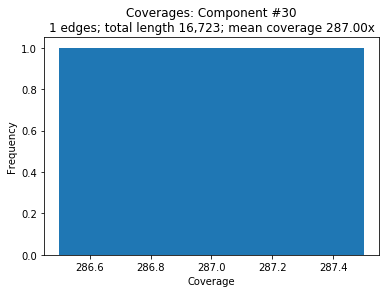

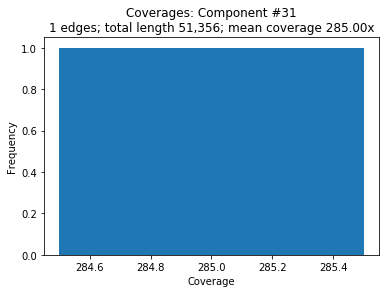

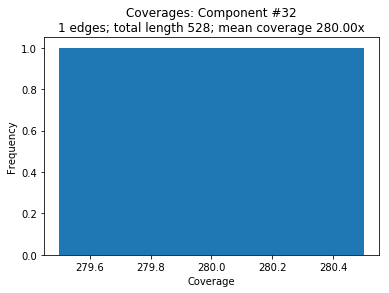

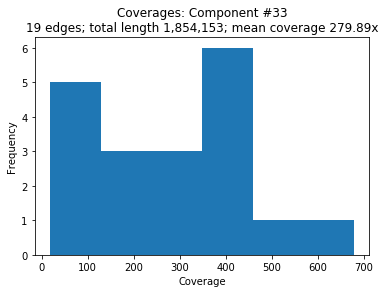

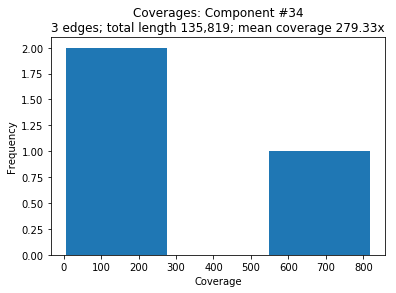

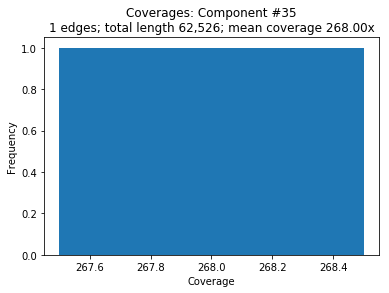

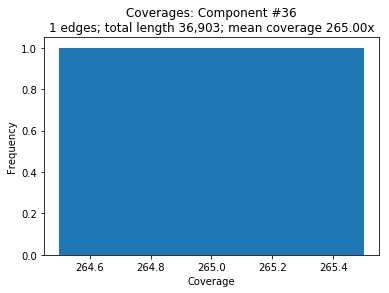

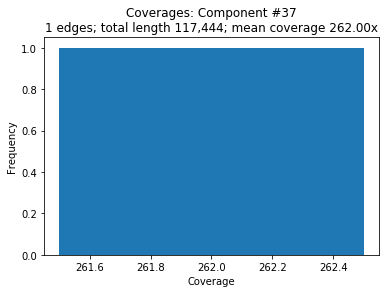

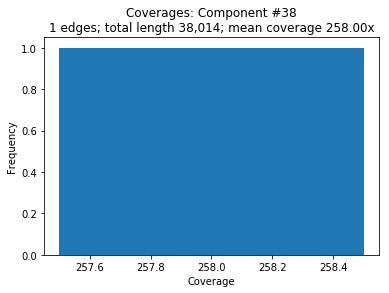

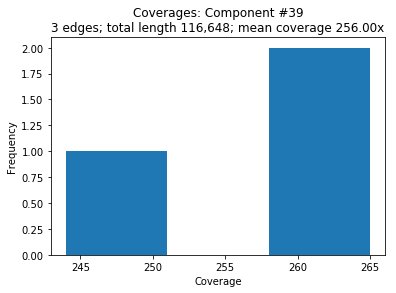

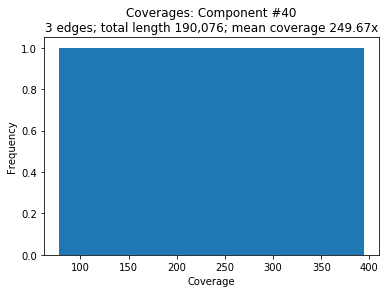

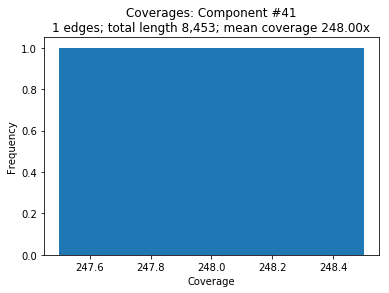

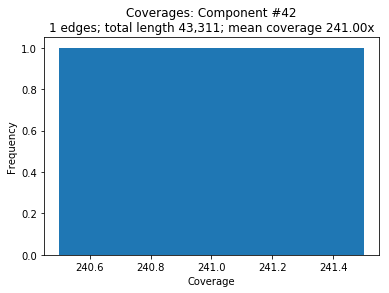

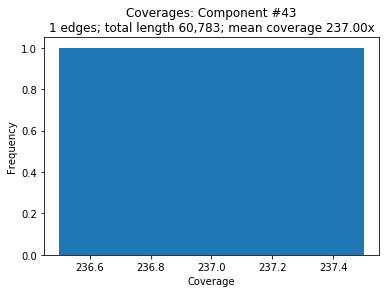

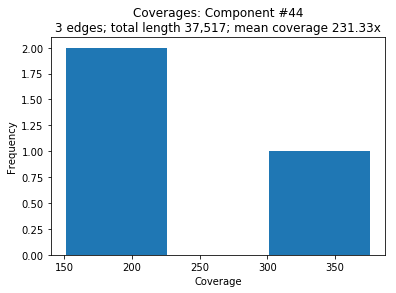

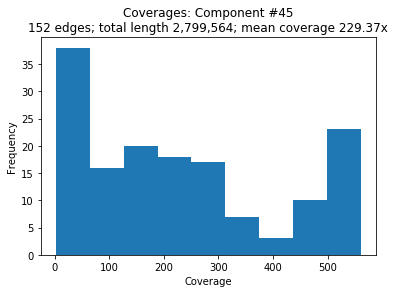

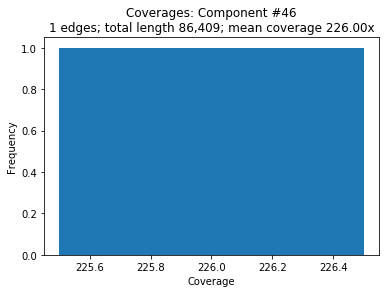

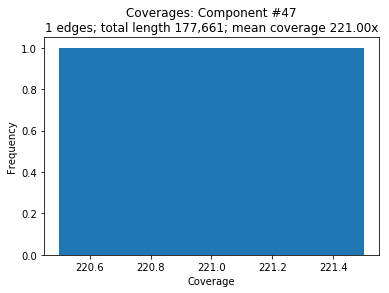

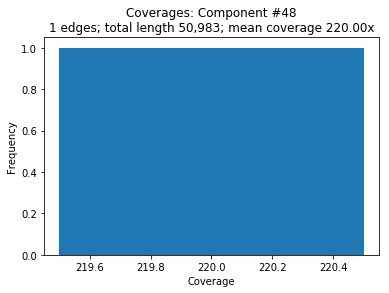

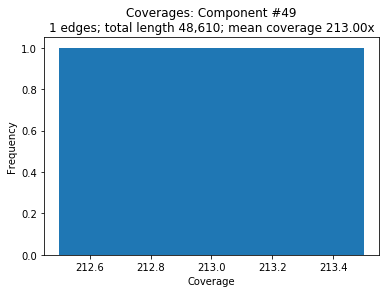

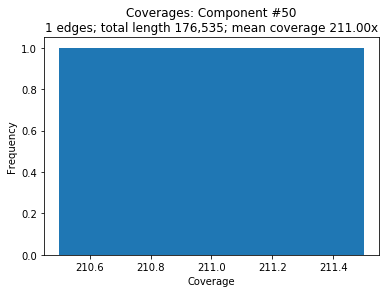

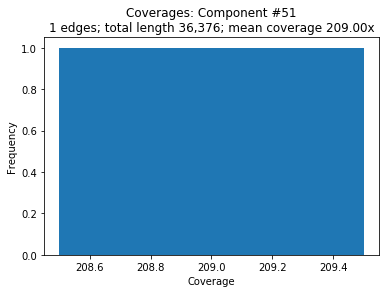

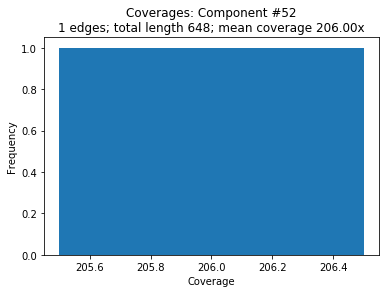

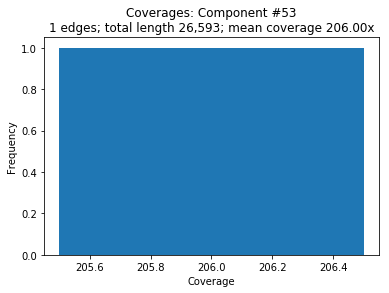

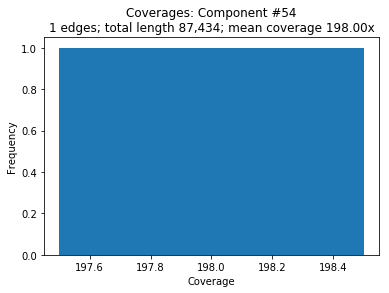

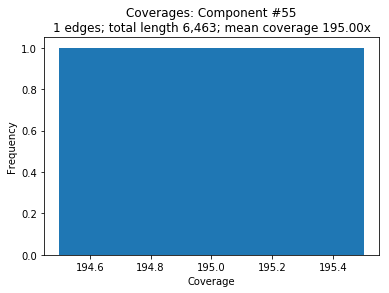

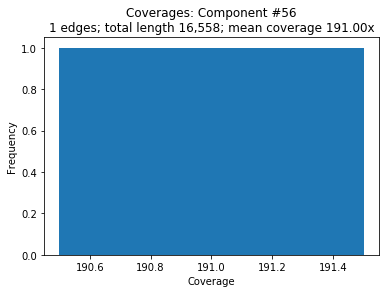

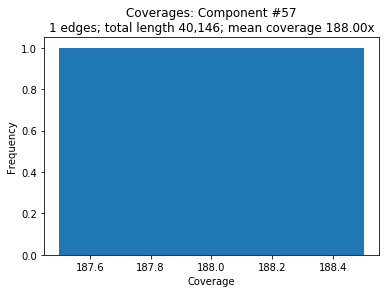

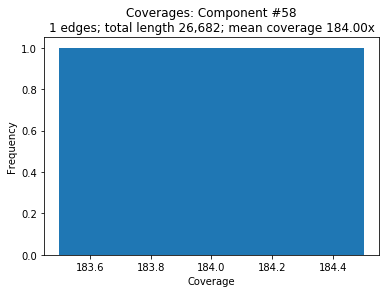

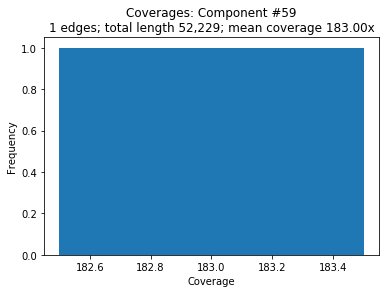

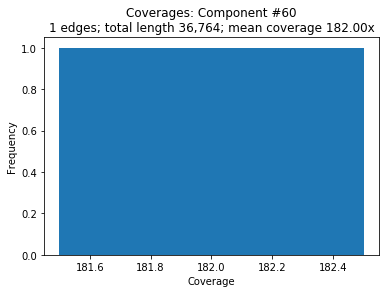

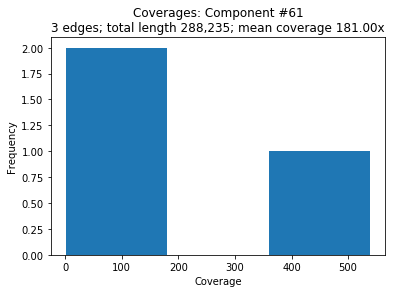

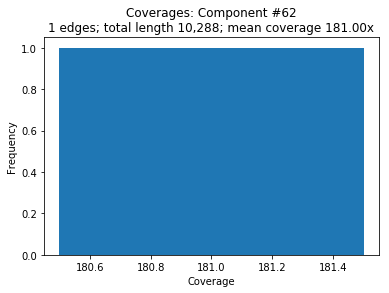

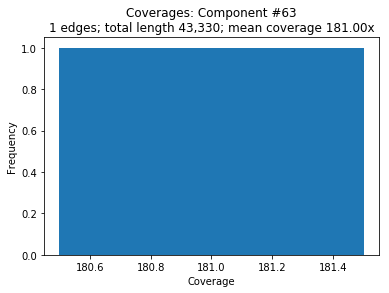

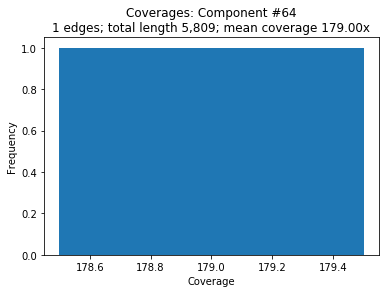

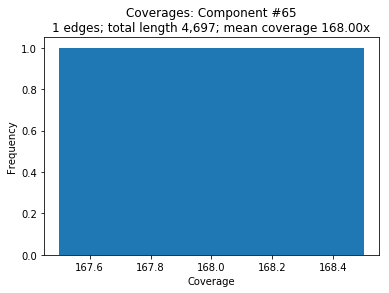

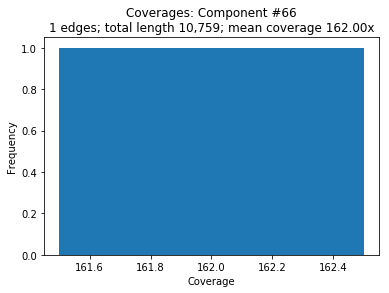

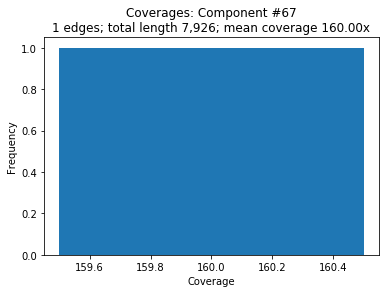

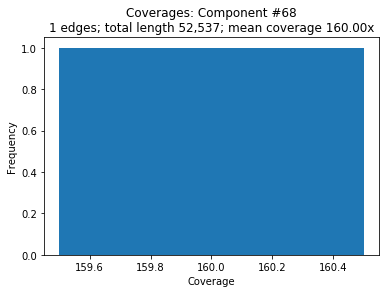

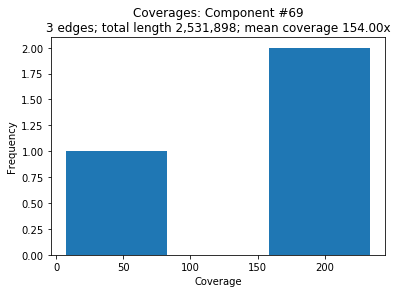

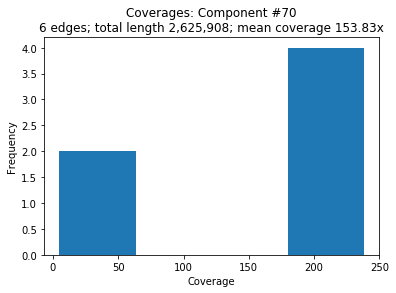

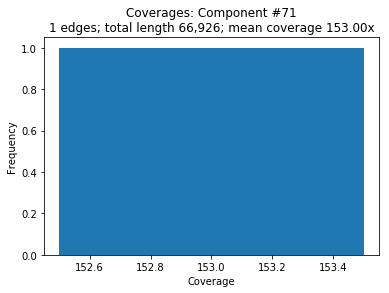

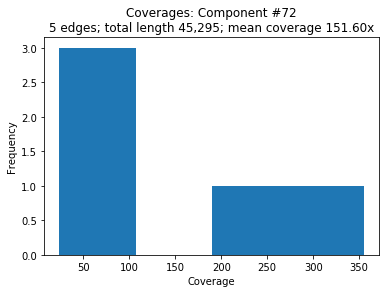

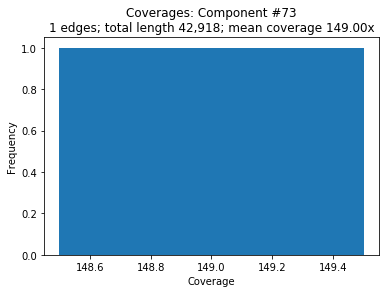

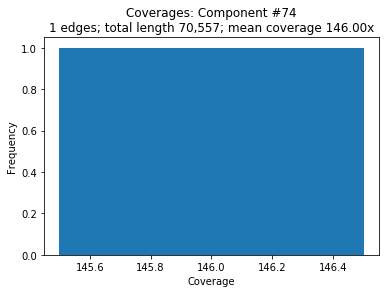

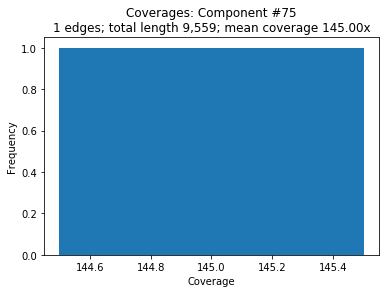

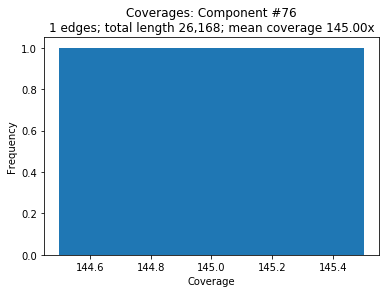

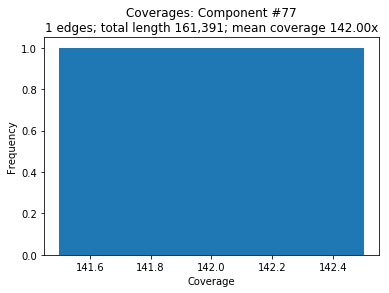

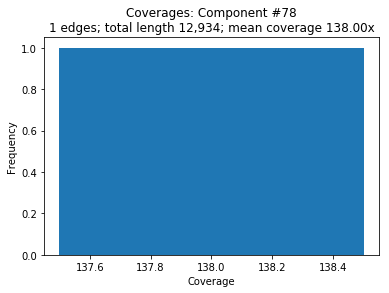

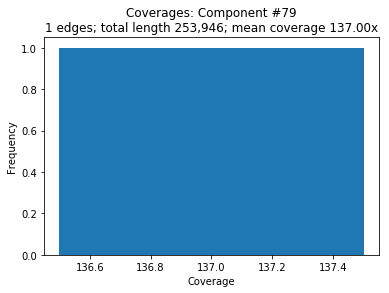

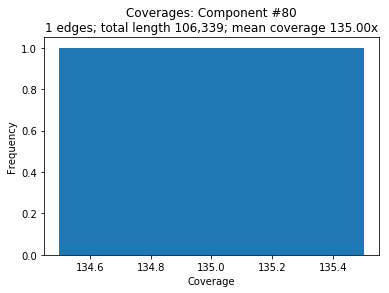

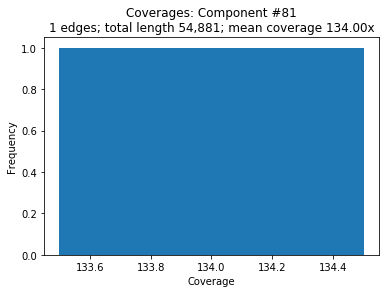

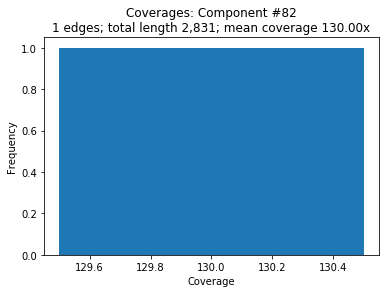

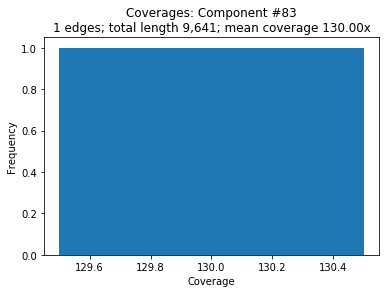

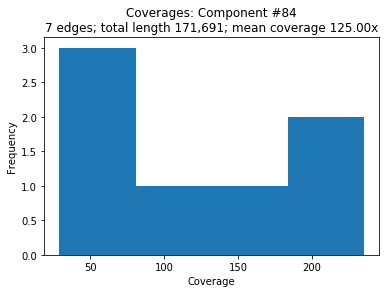

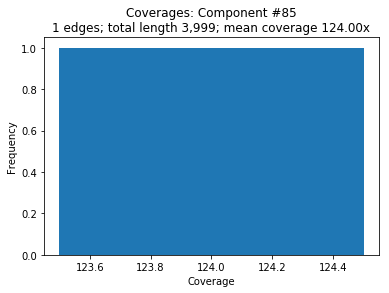

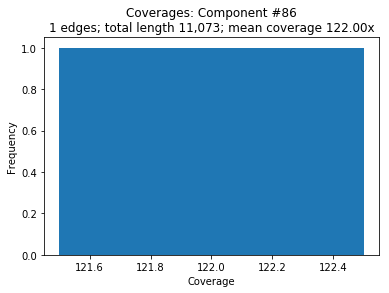

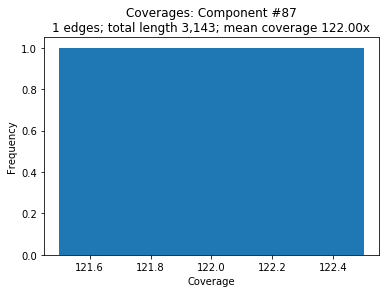

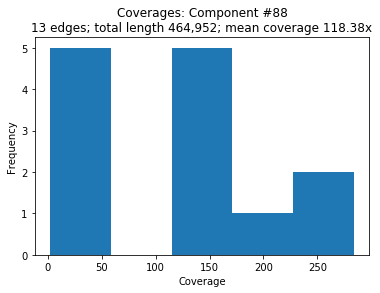

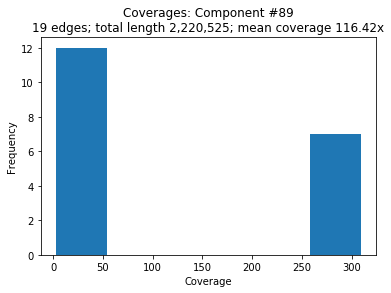

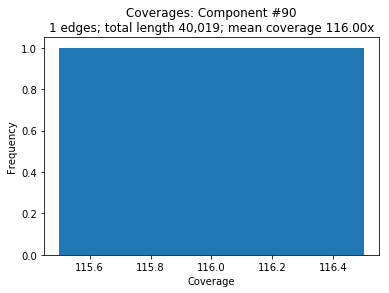

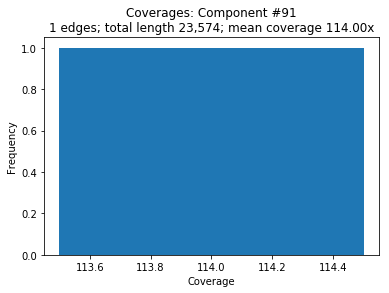

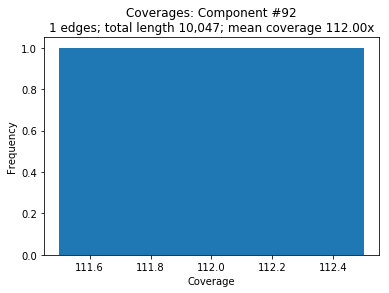

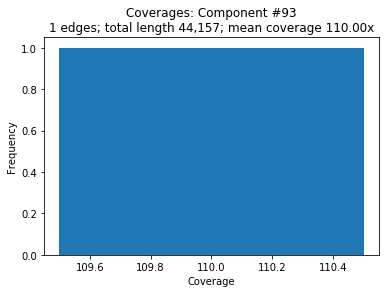

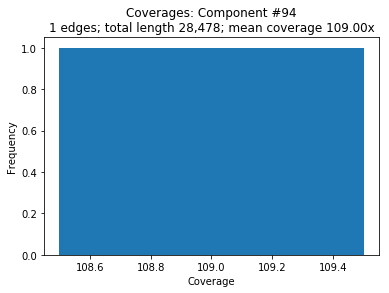

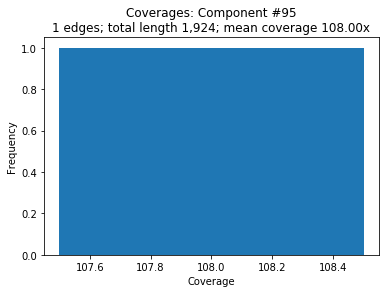

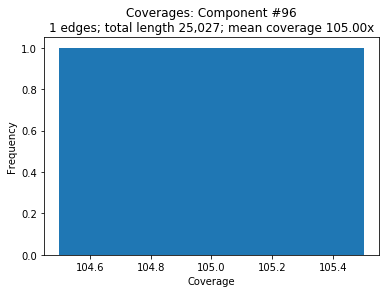

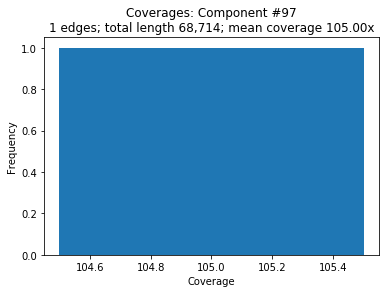

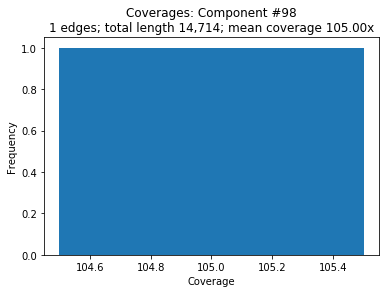

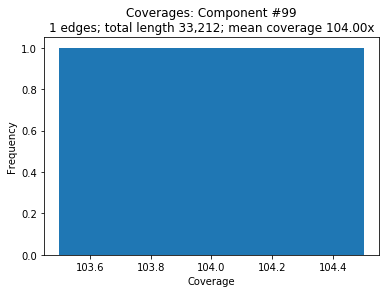

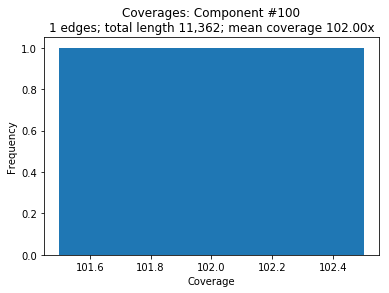

In [10]:
%matplotlib inline
import math

N = 100

for i in range(N):
    title = "Coverages: Component #{}\n{:,} edges; total length {:,}; mean coverage {:.2f}x".format(
        i + 1, len(cmp2cov[i]), cmp2totalLen[i], cmp2meanCov[i]
    )
    pyplot.hist(x=cmp2cov[i], bins="auto")
        
    pyplot.xlabel("Coverage")
    pyplot.ylabel("Frequency")
    pyplot.title(title)
    pyplot.show()

## How many of the top $N$ components contain just 1 edge?

In [11]:
num_1_edge_cmps = 0
for i in range(N):
    if len(cmp2cov[i]) == 1:
        num_1_edge_cmps += 1
print("{} of the top {} components have just 1 edge.".format(num_1_edge_cmps, N))

84 of the top 100 components have just 1 edge.


## For all components, plot number of edges vs. mean coverage

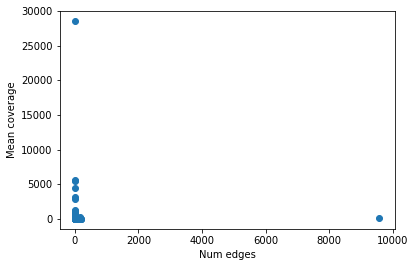

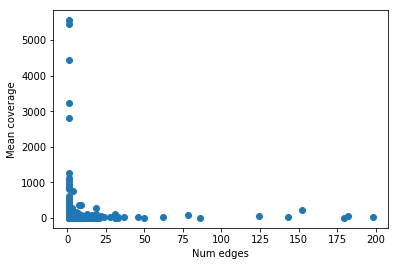

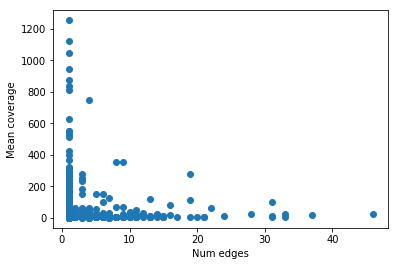

In [22]:
for cutoffs in [ [float("inf"), float("inf")], [1000, 10000], [50, 2000] ]:
    num_edges = []
    mean_cov = []
    for i, cmp in enumerate(sorted_components):
        ne = len(cmp)
        mc = cmp2meanCov[i]
        if ne < cutoffs[0] and mc < cutoffs[1]:
            num_edges.append(ne)
            mean_cov.append(mc)

    pyplot.scatter(x=num_edges, y=mean_cov)
    pyplot.xlabel("Num edges")
    pyplot.ylabel("Mean coverage")
    pyplot.show()